# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***.

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [2]:
import pandas as pd

# Run this cell if you
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cleaned_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

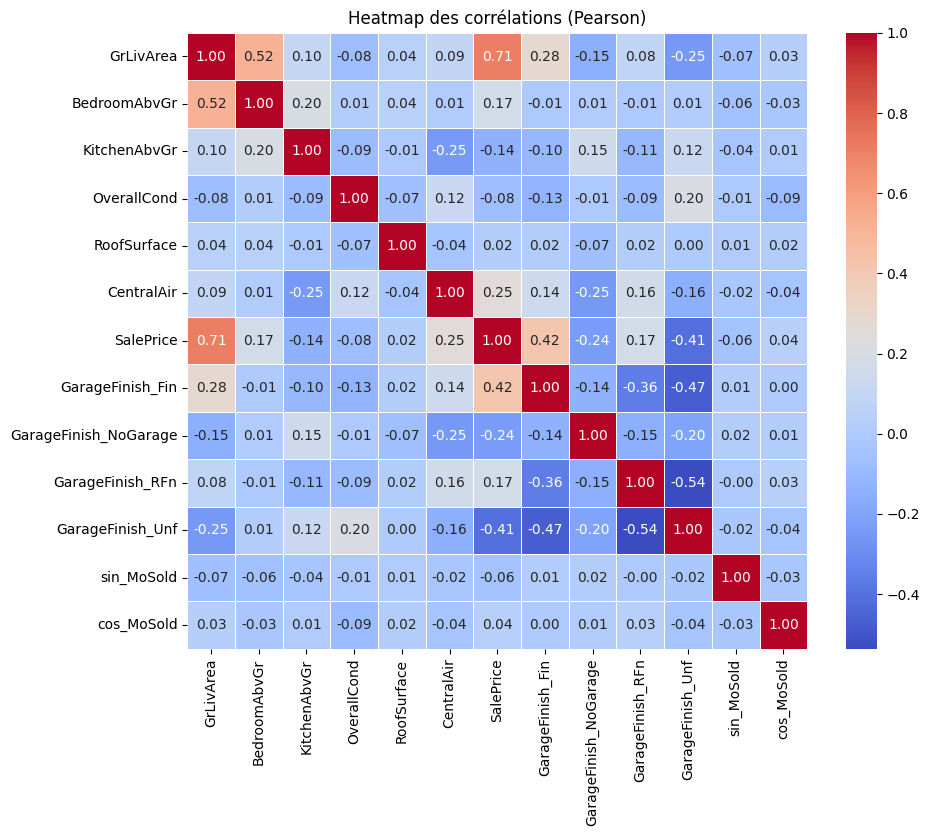

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr = data.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap des corrélations (Pearson)")
plt.show()


❓ Visualize the correlation between column pairs in a dataframe ❓

In [ ]:
# YOUR CODE HERE

❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [6]:
import numpy as np
# Calcul de la matrice de corrélation
corr = data.corr().abs()

# On ne garde que la moitié supérieure (pour ne pas compter deux fois les paires)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Compte le nombre de corrélations supérieures à 0.9
correlated_features = (upper > 0.9).sum().sum()

correlated_features


0

🧪 **Test your code**

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features=correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [8]:
# Séparation des features et de la cible
X = data.drop(columns="SalePrice")
y = data["SalePrice"]


❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [9]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Création du modèle
model = LinearRegression()

# Validation croisée (ici scoring par R²)
base_model_score = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

base_model_score


0.6419144066998049

🧪 **Test your code**

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score=base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [11]:
# YOUR CODE HERE
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

# 1. On réentraîne le modèle sur tout le dataset
model = LinearRegression().fit(X, y)

# 2. On calcule l’importance par permutation
perm_importance = permutation_importance(model, X, y, scoring='r2', n_repeats=10, random_state=42)

# 3. On range les variables par ordre d’importance décroissant
importance_df = (
    pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    })
    .sort_values(by='importance', ascending=False)
)

importance_df
best_feature = importance_df.iloc[0]['feature']
best_feature


'GrLivArea'

❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [ ]:
# YOUR CODE HERE

🧪 **Test your code**

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature=best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one.
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [13]:
# YOUR CODE HERE
importance_df

,feature,importance
0,GrLivArea,1.006039
1,BedroomAbvGr,0.062162
6,GarageFinish_Fin,0.051204
9,GarageFinish_Unf,0.020919
2,KitchenAbvGr,0.019679
5,CentralAir,0.016060
8,GarageFinish_RFn,0.012204
7,GarageFinish_NoGarage,0.011292
10,sin_MoSold,0.001001
3,OverallCond,0.000256


In [15]:
X = data[['GrLivArea','BedroomAbvGr','GarageFinish_Fin', 'GarageFinish_Unf', 'KitchenAbvGr', 'CentralAir']]
y = data["SalePrice"]


# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Création du modèle
model2 = LinearRegression()

# Validation croisée (ici scoring par R²)
simplified_model_score = cross_val_score(model2, X, y, cv=5, scoring='r2').mean()

simplified_model_score

0.6332274410169287

🧪 **Test your code**

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score=simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!